In [1]:
# standard libraries for dataset
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import datasets with pandas
dataset_path = './best_in_show.csv'
df = pd.read_csv(dataset_path)

In [3]:
# check dataset
df.head(5)

,Dog breed,Unnamed: 1,category,Unnamed: 3,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,Unnamed: 9,...,Unnamed: 59,"Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
0,Additional info,NaN,American Kennel Club group,NaN,NaN,"1- 173, 1 = most poular, US. American Kennel C...",ranking within breeds with full data only,NaN,"in descending rank (higher score = better), n...",NaN,...,NaN,"if no average lifespan data, then 'no data'",converted to US $ using Google Finance,NaN,averaged across all dog breeds. pet food exclu...,NaN,NaN,NaN,NaN,"Initial outlay: leash, collar, ID tag; food di..."
1,Border Collie,NaN,herding,NaN,3.64,45,39,"$20,143",48%,NaN,...,NaN,"13,095","1,046",784.0,121,126.0,244.0,177.0,116.0,200
2,Border Terrier,NaN,terrier,NaN,3.61,80,61,"$22,638",14%,NaN,...,NaN,"14,643","1,046",784.0,121,126.0,244.0,177.0,116.0,200
3,Brittany,NaN,sporting,NaN,3.54,30,30,"$22,589",16%,NaN,...,NaN,"13,514","1,046",784.0,121,126.0,244.0,177.0,116.0,200
4,Cairn Terrier,NaN,terrier,NaN,3.53,59,48,"$21,992",22%,NaN,...,NaN,"14,476","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 69 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Dog breed                                                         175 non-null    object 
 1   Unnamed: 1                                                        0 non-null      float64
 2   category                                                          173 non-null    object 
 3   Unnamed: 3                                                        0 non-null      float64
 4   datadog score                                                     87 non-null     float64
 5   POPULARITY IN US                                                  173 non-null    object 
 6   POPULARITY IN US.1                                                88 non-null     object 
 7   LIFETIME COST, $                   

#### Dropping useless columns

In [5]:
unnamed_col = [i for i in df.columns if i.__contains__('Unnamed')]
print(unnamed_col)    

['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 9', 'Unnamed: 24', 'Unnamed: 30', 'Unnamed: 36', 'Unnamed: 46', 'Unnamed: 59']


In [6]:
df.drop(unnamed_col,axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 61 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Dog breed                                                         175 non-null    object 
 1   category                                                          173 non-null    object 
 2   datadog score                                                     87 non-null     float64
 3   POPULARITY IN US                                                  173 non-null    object 
 4   POPULARITY IN US.1                                                88 non-null     object 
 5   LIFETIME COST, $                                                  172 non-null    object 
 6   5 LIFETIME COST                                                   88 non-null     object 
 7   1 INTELLIGENCE (TRAINABILITY) ranki

In [8]:
# some columns look very similar
df[['POPULARITY IN US','POPULARITY IN US.1','LIFETIME COST, $','5 LIFETIME COST','1 INTELLIGENCE (TRAINABILITY) ranking','INTELLIGENCE (TRAINABILITY) ranking',
   '2 LONGEVITY','LONGEVITY','3 NO. OF GENETIC AILMENTS','GENETIC AILMENTS','4a average purchase price, US$','average purchase price, US$',
   '4b food costs per year, US$','food costs per year, US$','4 LIFETIME COST, $','LIFETIME COST, $']]



,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,2 LONGEVITY,LONGEVITY,3 NO. OF GENETIC AILMENTS,GENETIC AILMENTS,"4a average purchase price, US$","average purchase price, US$","4b food costs per year, US$","food costs per year, US$","4 LIFETIME COST, $","LIFETIME COST, $"
0,"1- 173, 1 = most poular, US. American Kennel C...",ranking within breeds with full data only,NaN,"in descending rank (higher score = better), n...",1 = easiest to train / learn new commands,"in descending rank (higher score = better), n...","years, weighted average - see note",in ascending rank order (higher score = better...,serious only,0 = 100% ... 9 = 0%,"mean, from puppyfind.com",reverse ranked percentile,NaN,reverse ranked percentile,NaN,NaN
1,45,39,"$20,143",48%,1,100%,12.52,79%,2,78%,$623,71%,$324,68%,"17,404","$20,143"
2,80,61,"$22,638",14%,30,70%,14.00,98%,0,100%,$833,44%,$324,68%,"19,575","$22,638"
3,30,30,"$22,589",16%,19,80%,12.92,89%,0,100%,$618,72%,$466,23%,"19,503","$22,589"
4,59,48,"$21,992",22%,35,61%,13.84,95%,2,78%,$435,95%,$324,68%,"18,965","$21,992"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,32,NaN,no data,NaN,21,NaN,no data,NaN,1,NaN,$562,NaN,NaN,NaN,no data,no data
171,99,NaN,no data,NaN,53,NaN,no data,NaN,0,NaN,$843,NaN,NaN,NaN,no data,no data
172,100,NaN,no data,NaN,51,NaN,13.17,NaN,0,NaN,$668,NaN,NaN,NaN,no data,no data
173,92,NaN,no data,NaN,46,NaN,8.80,NaN,0,NaN,$755,NaN,NaN,NaN,no data,no data


#### it looks like they contain the same information but expressed in a different way. In order to increase clarity, we will keep only one column

In [9]:
df_clean = df.drop(['POPULARITY IN US.1','5 LIFETIME COST','INTELLIGENCE (TRAINABILITY) ranking',
        'LONGEVITY','GENETIC AILMENTS','average purchase price, US$',
        '4b food costs per year, US$'],axis=1).copy()
        

In [10]:
df_clean.drop(['grooming required ','suitability for children '],axis=1,inplace=True)

In [11]:
df_clean.head()

,Dog breed,category,datadog score,POPULARITY IN US,"LIFETIME COST, $",1 INTELLIGENCE (TRAINABILITY) ranking,2 LONGEVITY,3 NO. OF GENETIC AILMENTS,"4a average purchase price, US$","food costs per year, US$",...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
0,Additional info,American Kennel Club group,NaN,"1- 173, 1 = most poular, US. American Kennel C...",NaN,1 = easiest to train / learn new commands,"years, weighted average - see note",serious only,"mean, from puppyfind.com",reverse ranked percentile,...,food per week x 52.1775 x average lifespan (co...,"if no average lifespan data, then 'no data'",converted to US $ using Google Finance,NaN,averaged across all dog breeds. pet food exclu...,NaN,NaN,NaN,NaN,"Initial outlay: leash, collar, ID tag; food di..."
1,Border Collie,herding,3.64,45,"$20,143",1,12.52,2,$623,68%,...,"3,486","13,095","1,046",784.0,121,126.0,244.0,177.0,116.0,200
2,Border Terrier,terrier,3.61,80,"$22,638",30,14.00,0,$833,68%,...,"3,898","14,643","1,046",784.0,121,126.0,244.0,177.0,116.0,200
3,Brittany,sporting,3.54,30,"$22,589",19,12.92,0,$618,23%,...,"5,171","13,514","1,046",784.0,121,126.0,244.0,177.0,116.0,200
4,Cairn Terrier,terrier,3.53,59,"$21,992",35,13.84,2,$435,68%,...,"3,854","14,476","1,046",784.0,121,126.0,244.0,177.0,116.0,200


In [12]:
df_clean.columns

Index(['Dog breed', 'category', 'datadog score', 'POPULARITY IN US',
       'LIFETIME COST, $', '1 INTELLIGENCE (TRAINABILITY) ranking',
       '2 LONGEVITY', '3 NO. OF GENETIC AILMENTS',
       '4a average purchase price, US$', 'food costs per year, US$',
       '5a grooming required ', '5b suitability for children ',
       'ULTIMATE TOP DOG MEGA SCORE (with kids)',
       'ULTIMATE TOP DATA DOG MEGA RANKING - without kids',
       'ULTIMATE TOP DATA DOG MEGA RANKING - with kids',
       'ULTIMATE TOP DOG MEGA SCORE', 'POPULAR RATING', 'size category',
       'weight (kg)', 'weight (lbs)', 'shoulder height (cm)',
       'shoulder height (in)', 'note', 'intelligence category',
       'repetitions to understand new commands',
       'obey first command (% of time)',
       'longevity sample size - survey sample size',
       'GENETIC DISEASES - congenital ailments: summary / areas affected',
       'congenital ailments: summary / areas affected', 'exclude?',
       'most abandoned?', '

In [13]:
df.head()

,Dog breed,category,datadog score,POPULARITY IN US,POPULARITY IN US.1,"LIFETIME COST, $",5 LIFETIME COST,1 INTELLIGENCE (TRAINABILITY) ranking,INTELLIGENCE (TRAINABILITY) ranking,2 LONGEVITY,...,"food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","total, per year, £","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
0,Additional info,American Kennel Club group,NaN,"1- 173, 1 = most poular, US. American Kennel C...",ranking within breeds with full data only,NaN,"in descending rank (higher score = better), n...",1 = easiest to train / learn new commands,"in descending rank (higher score = better), n...","years, weighted average - see note",...,food per week x 52.1775 x average lifespan (co...,"if no average lifespan data, then 'no data'",converted to US $ using Google Finance,NaN,averaged across all dog breeds. pet food exclu...,NaN,NaN,NaN,NaN,"Initial outlay: leash, collar, ID tag; food di..."
1,Border Collie,herding,3.64,45,39,"$20,143",48%,1,100%,12.52,...,"3,486","13,095","1,046",784.0,121,126.0,244.0,177.0,116.0,200
2,Border Terrier,terrier,3.61,80,61,"$22,638",14%,30,70%,14.00,...,"3,898","14,643","1,046",784.0,121,126.0,244.0,177.0,116.0,200
3,Brittany,sporting,3.54,30,30,"$22,589",16%,19,80%,12.92,...,"5,171","13,514","1,046",784.0,121,126.0,244.0,177.0,116.0,200
4,Cairn Terrier,terrier,3.53,59,48,"$21,992",22%,35,61%,13.84,...,"3,854","14,476","1,046",784.0,121,126.0,244.0,177.0,116.0,200


#### there are also several columns that express the same value on  $ or £. We will keep just one of each to clarify the dataframe

In [14]:
df_clean.columns

Index(['Dog breed', 'category', 'datadog score', 'POPULARITY IN US',
       'LIFETIME COST, $', '1 INTELLIGENCE (TRAINABILITY) ranking',
       '2 LONGEVITY', '3 NO. OF GENETIC AILMENTS',
       '4a average purchase price, US$', 'food costs per year, US$',
       '5a grooming required ', '5b suitability for children ',
       'ULTIMATE TOP DOG MEGA SCORE (with kids)',
       'ULTIMATE TOP DATA DOG MEGA RANKING - without kids',
       'ULTIMATE TOP DATA DOG MEGA RANKING - with kids',
       'ULTIMATE TOP DOG MEGA SCORE', 'POPULAR RATING', 'size category',
       'weight (kg)', 'weight (lbs)', 'shoulder height (cm)',
       'shoulder height (in)', 'note', 'intelligence category',
       'repetitions to understand new commands',
       'obey first command (% of time)',
       'longevity sample size - survey sample size',
       'GENETIC DISEASES - congenital ailments: summary / areas affected',
       'congenital ailments: summary / areas affected', 'exclude?',
       'most abandoned?', '

In [15]:
[i for i in df_clean.columns if (i.__contains__('$') or i.__contains__('£'))]

['LIFETIME COST, $',
 '4a average purchase price, US$',
 'food costs per year, US$',
 '4 LIFETIME COST, $',
 'average purchase price (US $)',
 'lowest (US$)',
 'highest (US$)',
 'food per week, average, £',
 'min, £',
 'max, £',
 'food per week, $',
 'food per year, $',
 'food per lifetime, $',
 'Other regular costs, total per lifetime, $',
 'total  per year, $',
 'total, per year, £',
 'toys, presents, treats, per year, £',
 'pet sitters, per year, £',
 'grooming, per year, £',
 'vet fees per year, £',
 'kennels per year, £',
 'one offs, $']

In [16]:
df_clean.drop(['food per week, average, £','total, per year, £'],axis=1,inplace=True)

#### the first row it's a description of each column. We'll save it for reference, but drop it from the dataframe itself

In [17]:
columns_desc = df_clean.loc[0,:]

In [18]:
df_clean.drop(0,axis=0,inplace=True)

In [19]:
df_clean.head(5)

,Dog breed,category,datadog score,POPULARITY IN US,"LIFETIME COST, $",1 INTELLIGENCE (TRAINABILITY) ranking,2 LONGEVITY,3 NO. OF GENETIC AILMENTS,"4a average purchase price, US$","food costs per year, US$",...,"food per year, $","food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","toys, presents, treats, per year, £","pet sitters, per year, £","grooming, per year, £","vet fees per year, £","kennels per year, £","one offs, $"
1,Border Collie,herding,3.64,45,"$20,143",1,12.52,2,$623,68%,...,278,"3,486","13,095","1,046",121,126.0,244.0,177.0,116.0,200
2,Border Terrier,terrier,3.61,80,"$22,638",30,14.00,0,$833,68%,...,278,"3,898","14,643","1,046",121,126.0,244.0,177.0,116.0,200
3,Brittany,sporting,3.54,30,"$22,589",19,12.92,0,$618,23%,...,400,"5,171","13,514","1,046",121,126.0,244.0,177.0,116.0,200
4,Cairn Terrier,terrier,3.53,59,"$21,992",35,13.84,2,$435,68%,...,278,"3,854","14,476","1,046",121,126.0,244.0,177.0,116.0,200
5,Welsh Springer Spaniel,sporting,3.34,130,"$20,224",31,12.49,1,$750,68%,...,278,"3,478","13,064","1,046",121,126.0,244.0,177.0,116.0,200


#### we convert the remaining columns to the same currency (dollars)

In [20]:
columns_to_conv = ['toys, presents, treats, per year, £','pet sitters, per year, £','grooming, per year, £',
                     'vet fees per year, £','kennels per year, £']

In [21]:
df_clean['toys, presents, treats, per year, £'] = df_clean['toys, presents, treats, per year, £'].astype('float')

In [22]:
df_clean[columns_to_conv] = df_clean[columns_to_conv].fillna(0).apply(lambda x: round(x * 1.3611, 2))

In [23]:
df_clean.rename({'toys, presents, treats, per year, £':'toys, presents, treats, per year, $',
                'pet sitters, per year, £':'pet sitters, per year, $',
                'grooming, per year, £':'grooming, per year, $',
                'vet fees per year, £':'vet fees per year, $',
                'kennels per year, £':'kennels per year, $'},
                axis=1,inplace=True)

In [24]:
df_clean.head()

,Dog breed,category,datadog score,POPULARITY IN US,"LIFETIME COST, $",1 INTELLIGENCE (TRAINABILITY) ranking,2 LONGEVITY,3 NO. OF GENETIC AILMENTS,"4a average purchase price, US$","food costs per year, US$",...,"food per year, $","food per lifetime, $","Other regular costs, total per lifetime, $","total per year, $","toys, presents, treats, per year, $","pet sitters, per year, $","grooming, per year, $","vet fees per year, $","kennels per year, $","one offs, $"
1,Border Collie,herding,3.64,45,"$20,143",1,12.52,2,$623,68%,...,278,"3,486","13,095","1,046",164.69,171.5,332.11,240.91,157.89,200
2,Border Terrier,terrier,3.61,80,"$22,638",30,14.00,0,$833,68%,...,278,"3,898","14,643","1,046",164.69,171.5,332.11,240.91,157.89,200
3,Brittany,sporting,3.54,30,"$22,589",19,12.92,0,$618,23%,...,400,"5,171","13,514","1,046",164.69,171.5,332.11,240.91,157.89,200
4,Cairn Terrier,terrier,3.53,59,"$21,992",35,13.84,2,$435,68%,...,278,"3,854","14,476","1,046",164.69,171.5,332.11,240.91,157.89,200
5,Welsh Springer Spaniel,sporting,3.34,130,"$20,224",31,12.49,1,$750,68%,...,278,"3,478","13,064","1,046",164.69,171.5,332.11,240.91,157.89,200


In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 1 to 174
Data columns (total 50 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Dog breed                                                         174 non-null    object 
 1   category                                                          172 non-null    object 
 2   datadog score                                                     87 non-null     float64
 3   POPULARITY IN US                                                  172 non-null    object 
 4   LIFETIME COST, $                                                  172 non-null    object 
 5   1 INTELLIGENCE (TRAINABILITY) ranking                             172 non-null    object 
 6   2 LONGEVITY                                                       172 non-null    object 
 7   3 NO. OF GENETIC AILMENTS          

### Possibles preguntes a respondre

- Raça mes cara de mantenir?
- Raça amb millor score?
- Relació entre cost i score?
- Relació entre popularitat i cost?
- Relacio entre joguines i score?

### preparació de plots

#### ranking dogs per score

<BarContainer object of 174 artists>

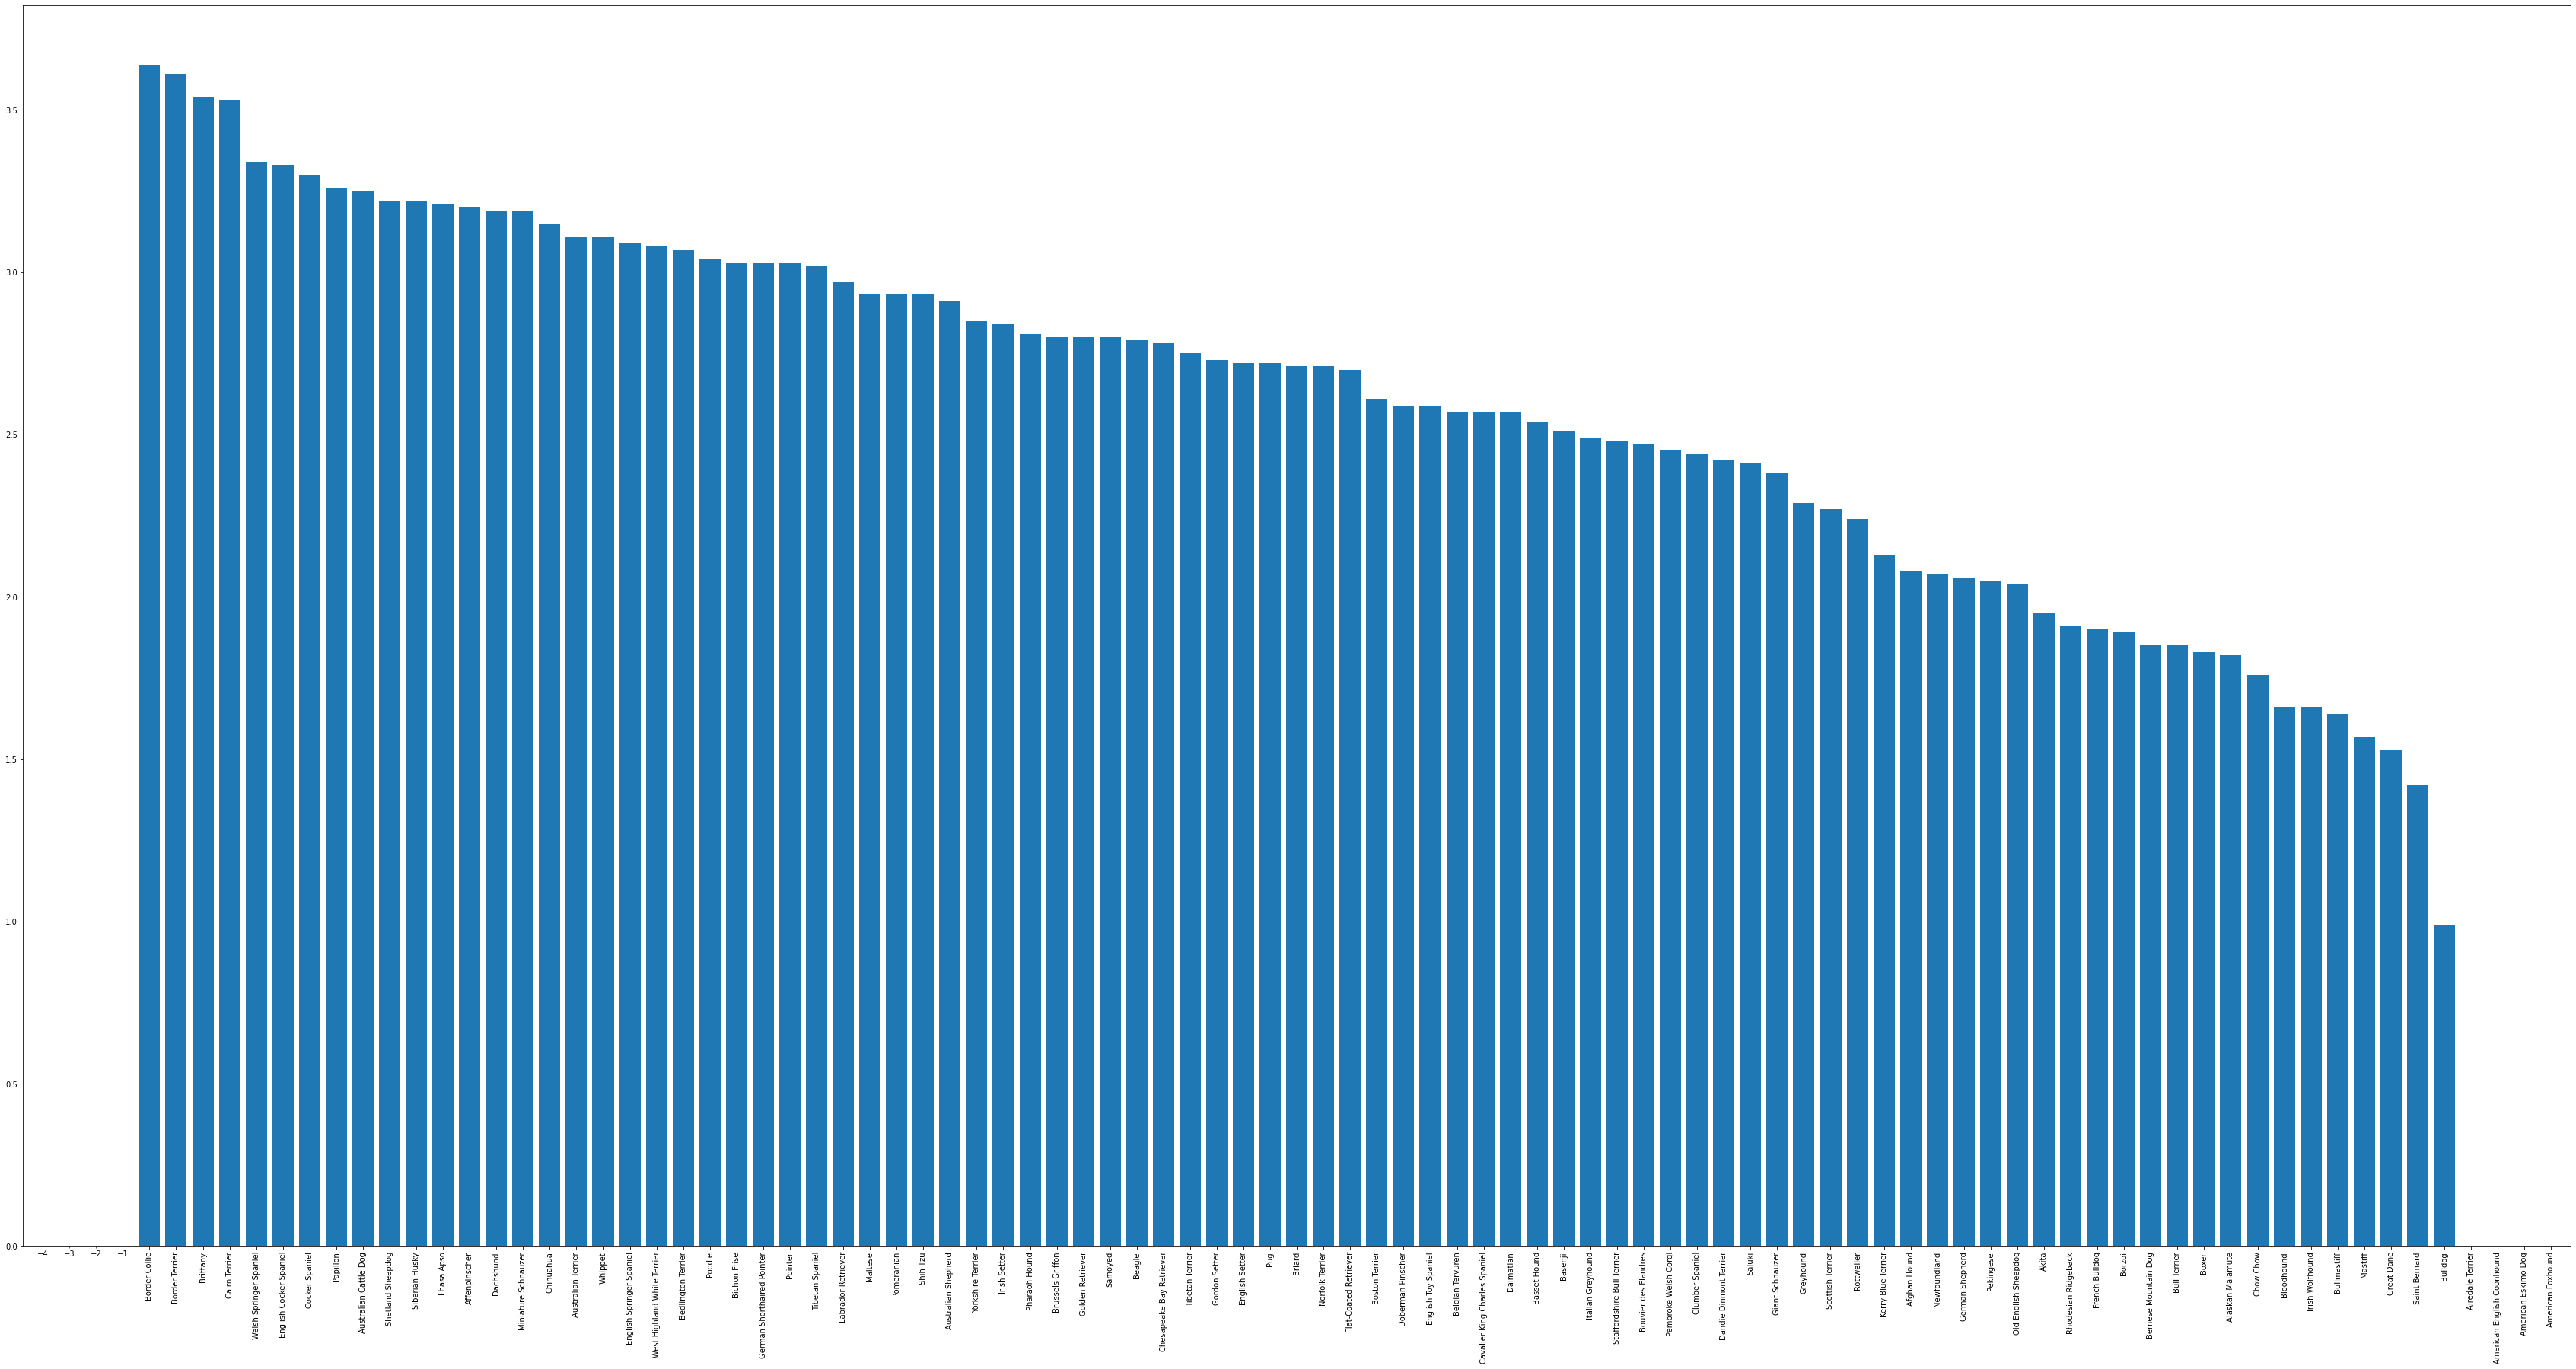

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(60,30)

from matplotlib.ticker import ScalarFormatter as SF
from matplotlib.ticker import MultipleLocator as ML
ax.xaxis.set_minor_locator(ML())
ax.xaxis.set_minor_formatter(SF())
ax.tick_params(axis='x',rotation=90)
ax.bar(df_clean['Dog breed'], df_clean['datadog score'])

Too many breeds, we will show  top 50

Text(0.5, 1.0, 'Top 50 dogs based on score')

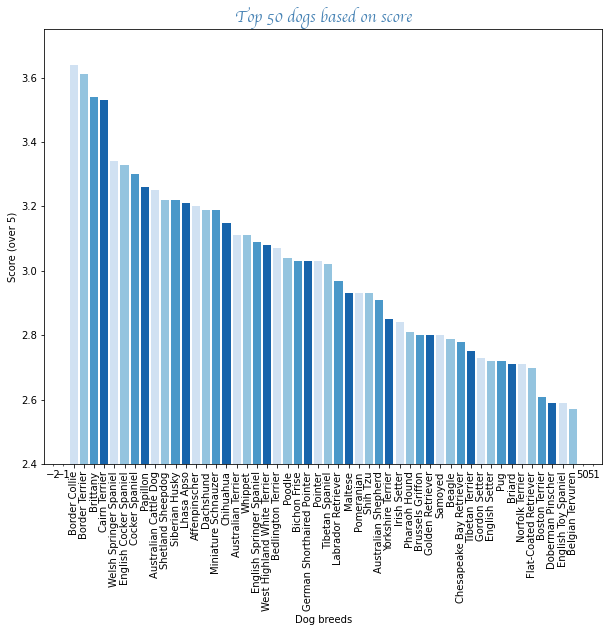

In [126]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
from matplotlib.ticker import ScalarFormatter as SF
from matplotlib.ticker import MultipleLocator as ML
ax.xaxis.set_minor_locator(ML())
ax.xaxis.set_minor_formatter(SF())
ax.tick_params(axis='x',rotation=90)
ax.set_ylim(2.4,3.75)
cmap = plt.get_cmap("Blues")
colors = [cmap(i) for i in [.2,.4,.6,.8]]
ax.bar(df_clean['Dog breed'][0:50], df_clean['datadog score'][0:50], color=colors)
ax.set_xlabel('Dog breeds')

ax.set_ylabel('Score (over 5)')
ax.set_title('Top 50 dogs based on score', color='steelblue',size=16,fontproperties='cursive')


In [51]:
help(fig)

Help on Figure in module matplotlib.figure object:

class Figure(FigureBase)
 |  Figure(figsize=None, dpi=None, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None, tight_layout=None, constrained_layout=None)
 |  
 |  The top level container for all the plot elements.
 |  
 |  The Figure instance supports callbacks through a *callbacks* attribute
 |  which is a `.CallbackRegistry` instance.  The events you can connect to
 |  are 'dpi_changed', and the callback will be called with ``func(fig)`` where
 |  fig is the `Figure` instance.
 |  
 |  Attributes
 |  ----------
 |  patch
 |      The `.Rectangle` instance representing the figure background patch.
 |  
 |  suppressComposite
 |      For multiple figure images, the figure will make composite images
 |      depending on the renderer option_image_nocomposite function.  If
 |      *suppressComposite* is a boolean, this will override the renderer.
 |  
 |  Method resolution order:
 |      Figure
 |      FigureBa

In [27]:
df_clean['food per week, $']

1         5.34
2         5.34
3         7.67
4         5.34
5         5.34
        ...   
170       7.67
171       5.34
172    no data
173    no data
174    no data
Name: food per week, $, Length: 174, dtype: object